In [101]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [6]:
TEST_DIR = "test"
TRAINING_DIR = "training"

## Loading dataset

In [12]:
training_labels_path = os.path.join(TRAINING_DIR, "labels.csv")
train_df = pd.read_csv(training_labels_path, index_col="ImageId")
train_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7046,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7047,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120


Total size of the training dataset is:

In [55]:
train_df.shape[0]

7049

Check if all images from labels are present:

In [26]:
all_exist = True
for i in range(1, 7049 + 1):
    if not os.path.exists(os.path.join(TRAINING_DIR, f"{i}.png")):
        all_exist = False
        print(f"Found missing image: {i}.png")
print("All images found!" if all_exist else "Some images not found!")

All images found!


Total size of test dataset is:

In [28]:
test_len = len(os.listdir(TEST_DIR))
test_len

1783

Image Size is 96x96, verifying for both test and training:

In [32]:
for file in os.listdir(TRAINING_DIR):
    if file.endswith(".png"):
        img_path = os.path.join(TRAINING_DIR, file)
        with Image.open(img_path) as img:
            width, height = img.size
            assert width == 96 and height == 96
print("Training images 96x96 size validated")

Training images 96x96 size validated


In [33]:
for file in os.listdir(TEST_DIR):
    if file.endswith(".png"):
        img_path = os.path.join(TRAINING_DIR, file)
        with Image.open(img_path) as img:
            width, height = img.size
            assert width == 96 and height == 96
print("Test images 96x96 size validated")

Test images 96x96 size validated


### Verifying that localization is interpreted correctly

Features availiable:

In [51]:
features = list(map(lambda x: x[:-2], df.columns[::2]))
"; ".join(features)

'left_eye_center; right_eye_center; left_eye_inner_corner; left_eye_outer_corner; right_eye_inner_corner; right_eye_outer_corner; left_eyebrow_inner_end; left_eyebrow_outer_end; right_eyebrow_inner_end; right_eyebrow_outer_end; nose_tip; mouth_left_corner; mouth_right_corner; mouth_center_top_lip; mouth_center_bottom_lip'

Taking the first training image data:

In [54]:
first_labels = df.iloc[0]
for i, pair in enumerate(zip(first_labels[0::2], first_labels[1::2])):
    print(features[i]," : ", pair)

left_eye_center  :  (66.0335639098, 39.0022736842)
right_eye_center  :  (30.2270075188, 36.4216781955)
left_eye_inner_corner  :  (59.582075188, 39.6474225564)
left_eye_outer_corner  :  (73.1303458647, 39.9699969925)
right_eye_inner_corner  :  (36.3565714286, 37.3894015038)
right_eye_outer_corner  :  (23.4528721805, 37.3894015038)
left_eyebrow_inner_end  :  (56.9532631579, 29.0336481203)
left_eyebrow_outer_end  :  (80.2271278195, 32.2281383459)
right_eyebrow_inner_end  :  (40.2276090226, 29.0023218045)
right_eyebrow_outer_end  :  (16.3563789474, 29.6474706767)
nose_tip  :  (44.4205714286, 57.0668030075)
mouth_left_corner  :  (61.1953082707, 79.9701654135)
mouth_right_corner  :  (28.6144962406, 77.3889924812)
mouth_center_top_lip  :  (43.3126015038, 72.9354586466)
mouth_center_bottom_lip  :  (43.1307067669, 84.4857744361)


In [60]:
from IPython.display import display
from PIL import ImageDraw
import random

In [70]:
def draw_cross(draw, x, y, color, size=5):
    draw.line((x - size, y, x + size, y), fill=color, width=1)
    draw.line((x, y - size, x, y + size), fill=color, width=1)

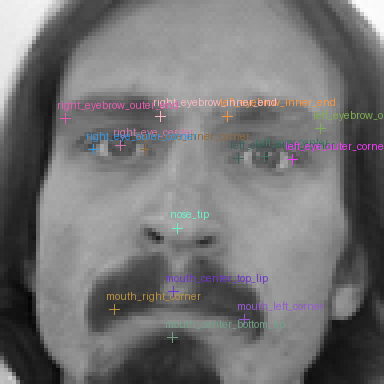

In [77]:
scale = 4
img = Image.open(os.path.join(TRAINING_DIR, "1.png")).convert("RGB")
w, h = img.size
scaled = img.resize((w * scale, h * scale), Image.NEAREST)
draw = ImageDraw.Draw(scaled)

for i, (x, y) in enumerate(zip(first_labels[0::2], first_labels[1::2])):
    color = tuple(random.randint(50, 255) for _ in range(3))
    sx, sy = x * scale, y * scale
    draw_cross(draw, sx, sy, color)
    text_x = sx - 2 * scale
    text_y = sy - 5 * scale
    draw.text((text_x, text_y), labels[i], fill=color)

display(scaled)

Left and right here refers to the point of view of the subject.

# Data Cleaning

## Duplicates

Check if there are duplicates in images:

In [81]:
import hashlib
from collections import defaultdict

Iterating over images in TRAINING_DIR, computing hash and looking for the same hash:

In [87]:
hashes = defaultdict(list)
    
for filename in os.listdir(TRAINING_DIR):
    if filename.endswith(".png"):
        path = os.path.join(TRAINING_DIR, filename)
        with open(path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        hashes[file_hash].append(filename)

duplicates = [files for files in hashes.values() if len(files) > 1]
duplicates

[['1907.png', '1908.png'],
 ['2295.png', '4130.png'],
 ['2298.png', '6420.png'],
 ['2299.png', '4703.png'],
 ['2303.png', '6413.png'],
 ['2304.png', '3573.png'],
 ['2305.png', '4700.png'],
 ['2308.png', '7028.png'],
 ['2311.png', '2925.png'],
 ['2312.png', '7010.png'],
 ['2317.png', '7014.png'],
 ['2318.png', '5263.png'],
 ['2320.png', '4688.png'],
 ['2330.png', '4719.png'],
 ['2333.png', '5818.png'],
 ['2334.png', '2363.png'],
 ['2337.png', '5307.png'],
 ['2340.png', '4171.png'],
 ['2341.png', '4172.png'],
 ['2342.png', '5302.png'],
 ['2344.png', '2975.png'],
 ['2354.png', '6459.png'],
 ['2362.png', '6434.png'],
 ['2365.png', '4754.png'],
 ['2367.png', '6464.png'],
 ['2368.png', '2991.png'],
 ['2374.png', '3628.png'],
 ['2375.png', '3008.png'],
 ['2376.png', '5868.png'],
 ['2379.png', '3022.png'],
 ['2380.png', '3627.png'],
 ['2389.png', '2995.png'],
 ['2391.png', '2998.png'],
 ['2397.png', '4769.png'],
 ['2399.png', '5356.png'],
 ['2403.png', '6498.png'],
 ['2404.png', '4790.png'],
 

In [90]:
total_removed = 0
train_nodup_df = train_df
for dup in duplicates:
    orig = dup[0]
    same = dup[1:]
    same_ids = list(map(lambda x: int(x[:-4]), same))
    train_nodup_df = train_nodup_df.drop(same_ids)
    total_removed += len(same)
print("Total number of removed images: ", total_removed)

Total number of removed images:  555


In [91]:
train_nodup_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


Image files of the duplicates are kept as further processing will be done based on dataframe, not files in directory.

Iterating over images in TEST_DIR, computing hash and looking for the same hash:

In [93]:
hashes = defaultdict(list)
    
for filename in os.listdir(TEST_DIR):
    if filename.endswith(".png"):
        path = os.path.join(TEST_DIR, filename)
        with open(path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        hashes[file_hash].append(filename)

duplicates = [files for files in hashes.values() if len(files) > 1]
duplicates

[['1068.png', '1675.png'],
 ['115.png', '196.png'],
 ['1158.png', '1783.png'],
 ['1243.png', '1249.png'],
 ['1258.png', '612.png'],
 ['1305.png', '659.png'],
 ['1355.png', '721.png'],
 ['1362.png', '1377.png'],
 ['1398.png', '1402.png'],
 ['1401.png', '1407.png'],
 ['1472.png', '852.png'],
 ['1526.png', '912.png'],
 ['1529.png', '1535.png'],
 ['1538.png', '914.png'],
 ['1545.png', '926.png'],
 ['1570.png', '1573.png', '950.png'],
 ['1571.png', '943.png', '949.png'],
 ['295.png', '390.png'],
 ['325.png', '392.png'],
 ['330.png', '385.png'],
 ['340.png', '394.png'],
 ['353.png', '395.png'],
 ['354.png', '387.png'],
 ['368.png', '388.png'],
 ['374.png', '396.png'],
 ['726.png', '744.png'],
 ['742.png', '747.png'],
 ['772.png', '779.png'],
 ['951.png', '952.png']]

As images themselves is all we have for the analysis, we remove the duplicates images:

In [96]:
for dup in duplicates:
    same = dup[1:]
    for file in same:
        file_path = os.path.join(TEST_DIR, file)
        if os.path.exists(file_path):
            os.remove(file_path)
            total_removed += 1
print("Total number of removed images: ", total_removed)

Total number of removed images:  586


Now, let's look into the dataset, if there are some duplicates value for the different images:

In [103]:
np.any(train_nodup_df.duplicated())

np.False_

There are no duplicates in data left after removing duplicate images.

## Missing Values

In [105]:
train_nodup_df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4224
left_eye_inner_corner_y      4224
left_eye_outer_corner_x      4228
left_eye_outer_corner_y      4228
right_eye_inner_corner_x     4227
right_eye_inner_corner_y     4227
right_eye_outer_corner_x     4226
right_eye_outer_corner_y     4226
left_eyebrow_inner_end_x     4225
left_eyebrow_inner_end_y     4225
left_eyebrow_outer_end_x     4270
left_eyebrow_outer_end_y     4270
right_eyebrow_inner_end_x    4225
right_eyebrow_inner_end_y    4225
right_eyebrow_outer_end_x    4258
right_eyebrow_outer_end_y    4258
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4226
mouth_left_corner_y          4226
mouth_right_corner_x         4225
mouth_right_corner_y         4225
mouth_center_top_lip_x       4220
mouth_center_top_lip_y       4220
mouth_center_bottom_lip_x      33
mouth_center_b